In [1]:
import numpy as np
#import tensorflow as tf
#from tensorflow import keras

In [2]:
aa = np.arange(150).reshape((30,5))
aa.shape

(30, 5)

In [3]:
np.mean(aa,axis=0)
np.std(aa,axis=0)

array([43.27720724, 43.27720724, 43.27720724, 43.27720724, 43.27720724])

In [4]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import time
print()
print('Loading matlab files...')
print()
wf_name = '../../matlab_files/gg_waveforms-R10_IL1B_TNF_03.mat'
ts_name = '../../matlab_files/gg_timestamps.mat'

waveforms = loadmat(wf_name)
#print(f' keys of matlab file: {waveforms.keys()}')
waveforms = waveforms['waveforms']
timestamps = loadmat(ts_name)['gg_timestamps']


Loading matlab files...



In [17]:
mean = np.mean(waveforms, axis=-1)
std  = np.std(waveforms, axis=-1)  
waveforms = waveforms - mean[:,None]
waveforms = waveforms/std[:,None]

np.min(waveforms,axis=-1)

array([-2.62995847, -1.98788507, -2.73797293, ..., -2.31471719,
       -2.55397843, -3.29495199])

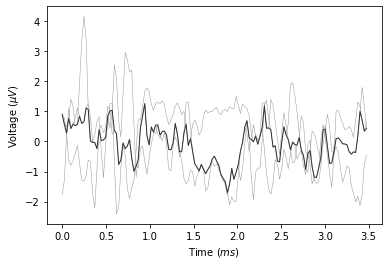

In [15]:
time = np.arange(0,3.5,3.5/waveforms.shape[-1])
ind = np.arange(10,31,10)

plt.plot(time,waveforms[ind,:].T,color = (0.6,0.6,0.6),lw=0.5)

plt.plot(time,np.median(waveforms[ind,:],axis=0),color = (0.2,0.2,0.2),lw=1)
plt.xlabel('Time $(ms)$')
plt.ylabel('Voltage $(\mu V)$')
plt.show()

In [35]:
wf = waveforms #[0::100,:]

corr_matrix = np.matmul(wf,wf[0,:].T)*1/(wf.shape[-1]-1)
del wf
#np.matmul(waveforms,waveforms.T).shape

12766


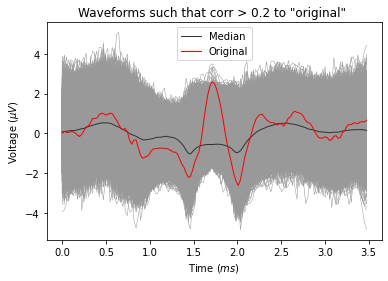

In [59]:
threshold = 0.2
bool_labels = corr_matrix>threshold
print(sum(bool_labels))

time = np.arange(0,3.5,3.5/waveforms.shape[-1])
plt.plot(time,waveforms[bool_labels].T,color = (0.6,0.6,0.6),lw=0.5)
plt.plot(time,np.median(waveforms[bool_labels],axis=0),color = (0.2,0.2,0.2),lw=1, label='Median')
plt.plot(time,waveforms[0,:],color = (1,0,0),lw=1, label='Original')


plt.xlabel('Time $(ms)$')
plt.ylabel('Voltage $(\mu V)$')
plt.title(f'Waveforms such that corr > {threshold} to "original" ')
plt.legend()
plt.show()

In [61]:
for i in range(10,100,20):
    print(i)

10
30
50
70
90
